In [1]:
#Jannat Butt
#21I-0259
#AI-K

# Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Adaptive Thresholding

In [3]:
def adaptive_thresholding(gray_scale_image):
    gridSize = 11
    offset = 2
    
    binaryimage = np.zeros_like(gray_scale_image, dtype=np.uint8)

    #dividing image into grids
    #a mean based approach the threshold is calculated as the mean (average) pixel value for the grid
    
    for y in range(gridSize// 2, gray_scale_image.shape[0] - gridSize // 2):
        for x in range(gridSize // 2, gray_scale_image.shape[1] - gridSize // 2):
            
            start_r=y - gridSize // 2
            end_r=y + gridSize // 2 + 1
            start_c=x - gridSize // 2
            end_c=x + gridSize // 2 + 1
            
            grid = gray_scale_image[start_r:end_r,start_c:end_c ]
            gridMean = np.mean(grid)
            
            #all of the pixels in a grid are given the thresholded 
            #value once the local threshold for each grid has been determined.
            
            thresh = gridMean - offset
            
            #if the pixel intensity is less than the thresh it is given 255 value
            #255 means hand gesture
            #if the pixel intensity is greater than the thresh than 0 is given
            #0 means background
            binaryimage[y, x] = 255 if gray_scale_image[y, x] < thresh else 0

    cv2.imshow('Binary Thresh Image', binaryimage)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return binaryimage


# Load image, Grayscale,resize,binaryThresh

In [4]:
def loading_image(path,size):
    
    rgb_image = cv2.imread(path)

    if rgb_image is None:
        print("Error Unable to load image.")
    else:
        resized_rgb_image=cv2.resize(rgb_image,size)
        
#         resized_rgb_image = np.zeros((size[0], size[1], 3), dtype=np.uint8)
        
#         resize_width = size[1]/rgb_image.shape[1]
#         resize_height = size[0]/rgb_image.shape[0]
        
#         for y in range(size[0]):
#             for x in range(size[1]):
#                 src_x =int(x/resize_width)
#                 src_y =int(y/resize_height)
#                 resized_rgb_image[y,x]=rgb_image[src_y, src_x]
                
        cv2.imshow('Loaded Image', resized_rgb_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        grayscale_image =( 0.299 *resized_rgb_image[:,:,0] + 0.587 *resized_rgb_image[:,:,1] + 0.114 *resized_rgb_image[:,:,2]).astype(np.uint8)
       
        cv2.imshow('Grayscale Image', grayscale_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        return grayscale_image

path = "ok.jpeg"
size=(224,224)
gray_scale_image = loading_image(path,size)
binaryimage=adaptive_thresholding(gray_scale_image)


# Dark points

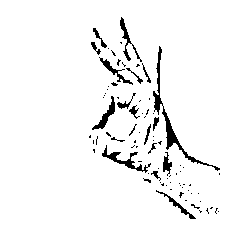

In [5]:
darkest_data_points = np.where(binaryimage == 255, binaryimage, np.nan)
plt.imshow(darkest_data_points, cmap='gray')
plt.axis('off')
plt.show()

# Cropping Hand prev (224,224) , (214,214)

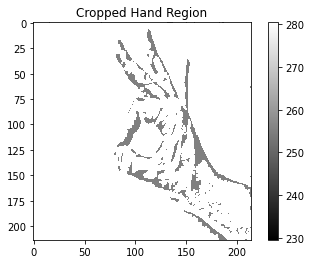

In [6]:


hand_cropped = darkest_data_points

row_indices, col_indices = np.where(hand_cropped  == 255)

min_row=np.min(row_indices)
min_col =np.min(col_indices)
max_row=np.max(row_indices)
max_col= np.max(col_indices)

hand_cropped =hand_cropped[min_row:max_row + 1, min_col:max_col + 1]


plt.imshow(hand_cropped, cmap='gray')
plt.title('Cropped Hand Region')
plt.colorbar()
plt.show()



In [7]:
hand_cropped .shape

(214, 214)

# Finding 100 datapoints

Best Row Index: 155
Row Score: 61
Best Column Index: 150
Column Score: 104


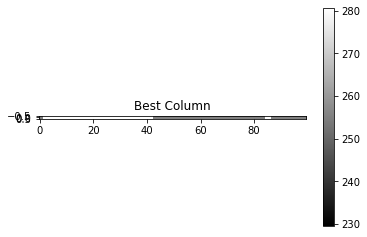

In [8]:
def count_255(row_or_col):
    return np.sum(row_or_col == 255)

count_inR=[]
count_inC=[]
for row in hand_cropped:
    count_inR.append(count_255(row))
    
for col in hand_cropped.T:
    count_inC.append(count_255(col))
    
best_R_ind = np.argmax(count_inR)
best_C_ind = np.argmax(count_inC)


best_R = hand_cropped[best_R_ind, :100]
best_C =hand_cropped[:100, best_C_ind]

print("Best Row Index:", best_R_ind)
print("Row Score:", count_inR[best_R_ind])
print("Best Column Index:", best_C_ind)
print("Column Score:", count_inC[best_C_ind])

if max(count_inR) >= max(count_inC):
    temp_data = best_R
    title = 'Best Row'
else:
    temp_data  = best_C
    title = 'Best Column'

plt.imshow(temp_data.reshape(1, -1), cmap='gray')
plt.title(title)
plt.colorbar()
plt.show()


In [9]:
temp_data 

array([255., 255.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255.,  nan, 255., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255.])

# Converting usefull points to df

In [10]:
usefull_datapoints=pd.DataFrame(temp_data)

In [11]:
usefull_datapoints

,0
0,255.0
1,255.0
2,NaN
3,NaN
4,NaN
...,...
95,255.0
96,255.0
97,255.0
98,255.0
